Task 1.

In [61]:
from matplotlib import pyplot as plt
import numpy as np
import random

Variance is: 1.1509572745316836 Mean is: -0.11349255269403676


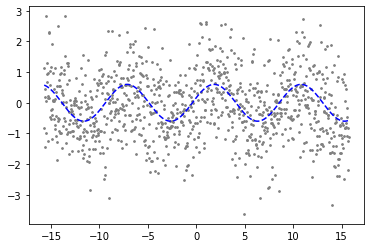

In [30]:
x = np.linspace(-np.pi*5, np.pi*5, 1000)
y = 0.6*np.cos(0.7*x+5)
noisy_y = y + np.random.normal(0,1,x.shape) # generating normal distributed noise
plt.scatter(x,noisy_y,s=3,color='grey')
plt.plot(x,y,color='b', linestyle='--')
print("Variance is:", np.var(noisy_y), "Mean is:", np.mean(noisy_y))

So I am using 0.6 as amplitude value, 0.7 as frequency and 5 as shift rigth.
Let's now try to estimate the amplitude.

0.5317094905300327


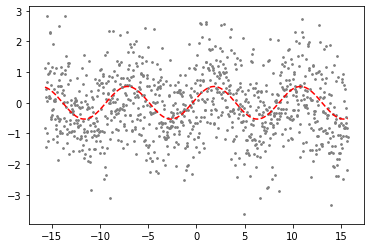

In [37]:
roof = sum([i*np.cos(0.7*j + 5) for i,j in zip(noisy_y,x)])
floor = sum([np.cos(0.7*i+5)**2 for i in x])
plt.plot(x, (roof/floor)*np.cos(0.7*x+5), color='r', linestyle='--')
plt.scatter(x,noisy_y,s=3,color='grey')
#plt.plot(x,y,color='r', linestyle='--')
exp_amp = []
for i in range(0,10000):
    exp_amp.append(roof/floor)
print(np.mean(exp_amp))

Task 2. Poisson generated data

In [135]:
data = np.random.poisson(5,1000)
gamma = sum(data)/len(data)
print(gamma)

4.987


Task 3.


(400, 2)


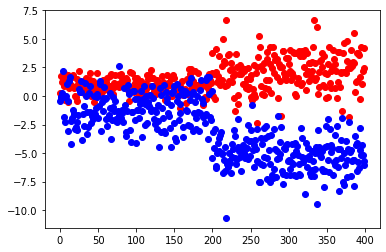

In [119]:
from scipy.io import loadmat
import os
os.chdir("Z:\Documents\TUT\Pattern Recognition and Machine Learning\Exercises\Ex1\Ex1_data")
mat = loadmat("twoClassData.mat")
#print(mat.keys())
X = mat['X']
Y = mat['y'].ravel()
plt.plot(X[:,0],'ro',X[:,1],'bo')

Task 4.

1300 x 1030


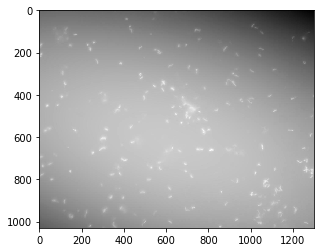

In [38]:
from matplotlib.image import imread
import os
os.chdir("Z:\Documents\TUT\Pattern Recognition and Machine Learning\Exercises\Ex1")
img = imread("uneven_illumination.jpg")
plt.imshow(img,cmap='gray')
print(img.shape[1],"x",img.shape[0])
X, Y = np.meshgrid(range(1300),range(1030))
Z = img
x = X.ravel()
y = Y.ravel()
z = Z.ravel()

Let's do a feature matrix. The picture shows, thath background is somewhat paraboloid, so it must be a good idea to fit a paraboloid to the data.

In [42]:
H = np.column_stack((x**2, y**2, x*y, x, y, np.ones_like(x)))
print(H.shape)

(1339000, 6)


Now let's solve Least Square problem for polynomial x^2+y^2+xy+x+y+c=z

In [43]:
theta = np.linalg.lstsq(H,np.transpose(z),rcond=None)

We need only the parameters of the polynomial, so:

In [44]:
theta = theta[0]
print(theta)

[-8.00362309e-05 -2.88076884e-04  1.23260784e-04  2.20273745e-02
  2.83567086e-01  1.06844526e+02]


Now predict the background of the image

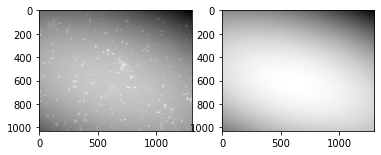

In [52]:
z_pred = H @ theta
Z_pred = np.reshape(z_pred,X.shape)
plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(Z_pred,cmap='gray')

Now just subtract background from the original image and get result

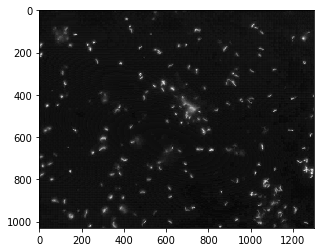

In [53]:
S = Z - Z_pred
plt.imshow(S,cmap='gray')

Task 5.
a) Generate sine with frequency 0.015 and noise in variance 0.3

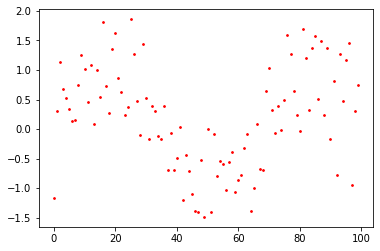

In [113]:
x = np.array(range(100))
y = np.sin(2*np.pi*0.015*x) + np.sqrt(0.3)*np.random.randn(100)
plt.scatter(x,y,s=3,color='red')

Task 5. b) Using given code template pedict amplitude

In [114]:
scores = []
frequencies = []

for f in np.linspace(0,0.5,1000):
    n = np.arange(100)
    z = -2*np.pi*1j*f*n
    e = np.exp(z)
    score = abs(np.dot(y,e))
    scores.append(score)
    frequencies.append(f)
fHat = frequencies[np.argmax(scores)]
print("{0:5.3f}".format(fHat))

0.014
